
image 1/1 C:\Users\DELL\PeopleDog.jpg: 448x640 1 person, 1 dog, 379.8ms
Speed: 7.9ms preprocess, 379.8ms inference, 18.8ms postprocess per image at shape (1, 3, 448, 640)


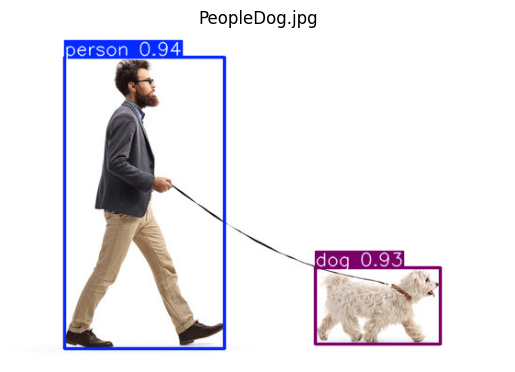


image 1/1 C:\Users\DELL\PeopleDogs2.jpg: 640x416 1 person, 2 dogs, 225.0ms
Speed: 4.9ms preprocess, 225.0ms inference, 4.3ms postprocess per image at shape (1, 3, 640, 416)


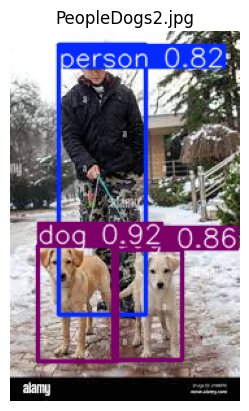


image 1/1 C:\Users\DELL\TableSofa.jpg: 640x640 1 bench, 2 couchs, 2 potted plants, 1 book, 1 vase, 248.2ms
Speed: 10.7ms preprocess, 248.2ms inference, 6.6ms postprocess per image at shape (1, 3, 640, 640)


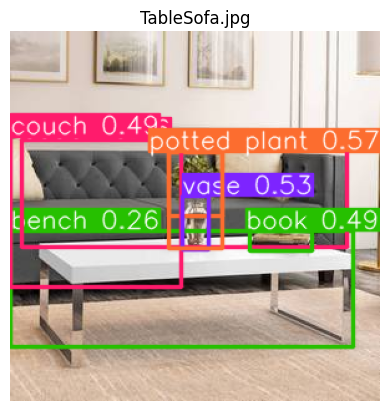


image 1/1 C:\Users\DELL\TableChairs4.jpg: 608x640 4 chairs, 1 potted plant, 1 dining table, 1 book, 298.1ms
Speed: 11.5ms preprocess, 298.1ms inference, 7.5ms postprocess per image at shape (1, 3, 608, 640)


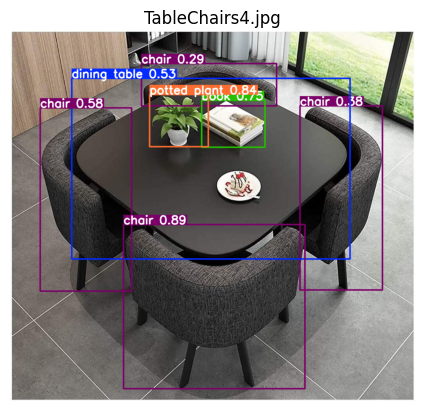


image 1/1 C:\Users\DELL\Signatures.jpg: 640x640 1 scissors, 270.6ms
Speed: 10.3ms preprocess, 270.6ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)


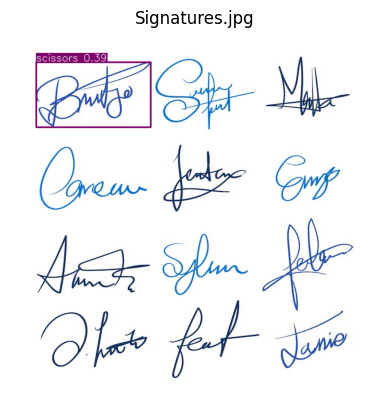

In [1]:
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load pretrained YOLO11n
model = YOLO("yolo11n.pt")

# List of test images
images = ["PeopleDog.jpg", "PeopleDogs2.jpg", "TableSofa.jpg", "TableChairs4.jpg", "Signatures.jpg"]

for img in images:
    results = model(img)
    for result in results:
        im_array = result.plot()                # draw boxes
        im = Image.fromarray(im_array[..., ::-1])
        plt.imshow(im)
        plt.axis("off")
        plt.title(img)
        plt.show()


In [2]:
# Load pretrained model
from ultralytics import YOLO
from PIL import Image
import matplotlib.pyplot as plt

# Load pretrained YOLO11n
model = YOLO("yolo11n.pt")


In [3]:
results = model.train(
    data="signature/signature.yaml",  # dataset config
    epochs=20,                        # try 20 if you want a quick run first
    imgsz=640
)


Ultralytics 8.3.201  Python-3.12.9 torch-2.8.0+cpu CPU (Intel Core i5-1035G1 1.00GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=signature/signature.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access  (ping: 0.10.0 ms, read: 71.215.4 MB/s, size: 70.7 KB)
val: Scanning C:\Users\DELL\signature\labels\val.cache... 35 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 35/35 35.0Kit/s 0.0s
Plotting labels to C:\Users\DELL\runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to C:\Users\DELL\runs\detect\train4
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
     

In [4]:
metrics = model.val()
print("mAP@50:", metrics.box.map50)
print("mAP@95:", metrics.box.map)

Ultralytics 8.3.201  Python-3.12.9 torch-2.8.0+cpu CPU (Intel Core i5-1035G1 1.00GHz)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 190.654.3 MB/s, size: 71.9 KB)
val: Scanning C:\Users\DELL\signature\labels\val.cache... 35 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 35/35 35.0Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 3/3 0.4it/s 6.9s5.9ss
                   all         35         35      0.999          1      0.995      0.952
Speed: 2.1ms preprocess, 135.4ms inference, 0.0ms loss, 11.3ms postprocess per image
Results saved to C:\Users\DELL\runs\detect\train42
mAP@50: 0.995
mAP@95: 0.9519062098566309


In [8]:
from ultralytics import YOLO

model_best = YOLO(r"C:\Users\DELL\runs\detect\train4\weights\best.pt")
model_last = YOLO(r"C:\Users\DELL\runs\detect\train4\weights\last.pt")



image 1/1 C:\Users\DELL\Signatures.jpg: 640x640 14 signatures, 597.8ms
Speed: 34.0ms preprocess, 597.8ms inference, 29.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 C:\Users\DELL\Signatures.jpg: 640x640 14 signatures, 312.7ms
Speed: 21.0ms preprocess, 312.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)


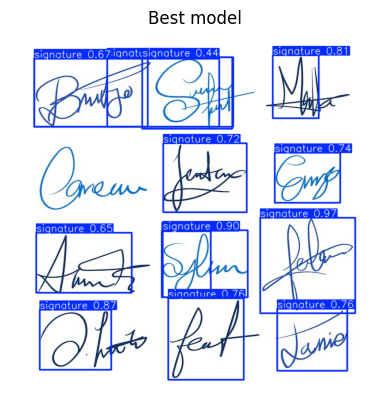

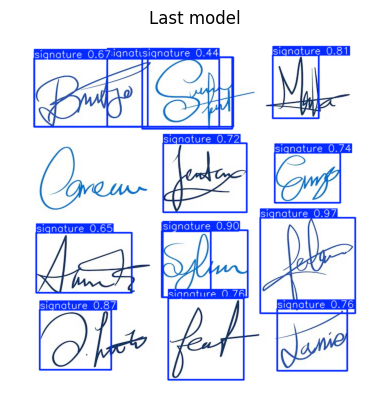

In [9]:
results_best = model_best("Signatures.jpg")
results_last = model_last("Signatures.jpg")

from PIL import Image
import matplotlib.pyplot as plt

for title, results in [("Best model", results_best), ("Last model", results_last)]:
    for result in results:
        im_array = result.plot()
        im = Image.fromarray(im_array[..., ::-1])
        plt.imshow(im)
        plt.axis("off")
        plt.title(title)
        plt.show()
